In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

Load data and reshape

In [16]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Quadratic intensity scaling

In [17]:
X_train = np.array(255*(X_train / 255) **2)
X_test = np.array(255*(X_test / 255) **2)

In [18]:
Y_train = keras.utils.np_utils.to_categorical(y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(y_test, 10)
print(Y_train.shape)
print(Y_train.shape)

(60000, 10)
(60000, 10)


Splitting into train and validations

In [19]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1) (54000, 10) (6000, 10)


Model

In [20]:
model = keras.models.Sequential()

#layer 1
#convolution
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))

#layer 2
#convolution
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
#max Pool
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
#dropout
model.add(keras.layers.Dropout(0.2))

#layer 3
#convolution  
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))

#layer 4
#convolution 
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
#max Pool
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))


#FC layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dropout(0.4))

#output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)       

Compiling

In [22]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [23]:
datagen =  keras.preprocessing.image.ImageDataGenerator(rotation_range=0.1, #randomly rotate the images
                             horizontal_flip = True, # randomly flip images
                             zoom_range = 0.1, # Randomly zoom image
                             width_shift_range=0.2, # randomly shift images horizontally
                             height_shift_range=0.2, # randomly shift images vertically
                             fill_mode='nearest')
datagen.fit(X_train)

Fitting

In [24]:
RLROP = ReduceLROnPlateau(monitor='val_loss', min_lr=0.00001, patience=20, mode='min', factor=0.2, verbose=1)
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    shuffle=True,
                    epochs=32, validation_data = (x_val, y_val),
                    verbose = 2, 
                    steps_per_epoch = x_train.shape[0] // 32, 
                    callbacks=[EarlyStopping(patience=20),RLROP])

Epoch 1/32
1687/1687 - 58s - loss: 0.8015 - accuracy: 0.7080 - val_loss: 0.4921 - val_accuracy: 0.8175
Epoch 2/32
1687/1687 - 29s - loss: 0.5700 - accuracy: 0.7908 - val_loss: 0.4156 - val_accuracy: 0.8490
Epoch 3/32
1687/1687 - 29s - loss: 0.5008 - accuracy: 0.8165 - val_loss: 0.3609 - val_accuracy: 0.8773
Epoch 4/32
1687/1687 - 29s - loss: 0.4602 - accuracy: 0.8323 - val_loss: 0.3112 - val_accuracy: 0.8890
Epoch 5/32
1687/1687 - 28s - loss: 0.4337 - accuracy: 0.8427 - val_loss: 0.3213 - val_accuracy: 0.8893
Epoch 6/32
1687/1687 - 28s - loss: 0.4132 - accuracy: 0.8487 - val_loss: 0.3176 - val_accuracy: 0.8850
Epoch 7/32
1687/1687 - 29s - loss: 0.4004 - accuracy: 0.8546 - val_loss: 0.2697 - val_accuracy: 0.9008
Epoch 8/32
1687/1687 - 28s - loss: 0.3840 - accuracy: 0.8598 - val_loss: 0.2898 - val_accuracy: 0.8978
Epoch 9/32
1687/1687 - 28s - loss: 0.3771 - accuracy: 0.8627 - val_loss: 0.2711 - val_accuracy: 0.9048
Epoch 10/32
1687/1687 - 28s - loss: 0.3671 - accuracy: 0.8664 - val_loss:

Accuracy

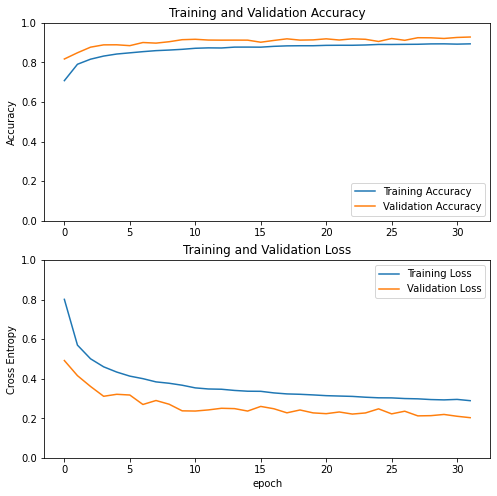

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
print('Train accuracy: ',history.history['accuracy'][-1])
print('Validation accuracy: ',history.history['val_accuracy'][-1])

score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy:  0.8941594958305359
Validation accuracy:  0.9286666512489319
Test Loss: 0.2206391543149948
Test Accuracy: 0.9199000000953674


So, with modifications, accuracy got better.
Train accuracy -> Before modification:88.7%, After modificaiton: 89.1%
Test accuracy -> Before: 89.1%, after: 91.99%

Accuracy could have gotten better if more epochs are used, but training is taking more time.